In [1]:
%matplotlib inline

import pandas as pd
import tables as tb
import tstables as tst
import numpy as np

from pylab import mpl, plt
from datetime import datetime
from data.config import GeneralConfig, load_config
from data.store import DataStore

figsize = (60, 20)

symbol = 'BTCUSDT'
tf = '5min'
# tf = None

config = GeneralConfig('E:/store/')
data = DataStore(config).load(symbol, tf)

data.drop(columns = ['open', 'high', 'low', 'volume'], inplace=True)

In [2]:
def calc(data, ma_fast):
    ma_slow = ma_fast * 4

    cn_ma_fast = f'ma_fast_{ma_fast}'
    cn_ma_slow = f'ma_slow_{ma_slow}'
    cn_position = f'position_{ma_fast}'
    cn_strat = f'strat_{ma_fast}'
    cn_strat_cs = f'strat_cs_{ma_fast}'

    data[cn_ma_fast] = data.close.rolling(ma_fast).mean()
    data[cn_ma_slow] = data.close.rolling(ma_slow).mean()

    data[cn_position] = np.where(data[cn_ma_fast] > data[cn_ma_slow], 1, -1)
    data.dropna(inplace=True)

    data[cn_strat] = data[cn_position].shift(1) * data.returns
    data[cn_strat_cs] = data[cn_strat].cumsum().apply(np.exp)

    data[f'strat_{ma_fast}_{ma_slow}'] = data[cn_strat_cs]
    data.drop(columns=[cn_ma_fast, cn_ma_slow, cn_position, cn_strat, cn_strat_cs], inplace=True)


def calc_multiple(data):
    calc(data, 10)
    calc(data, 20)
    calc(data, 30)
    calc(data, 40)
    calc(data, 50)
    calc(data, 60)
    calc(data, 70)
    calc(data, 80)
    calc(data, 90)
    calc(data, 100)


data['returns'] = np.log(data.close / data.close.shift(1))
data['returns_cs'] = data.returns.cumsum().apply(np.exp)

%time calc_multiple(data)

CPU times: total: 656 ms
Wall time: 665 ms


<AxesSubplot: >

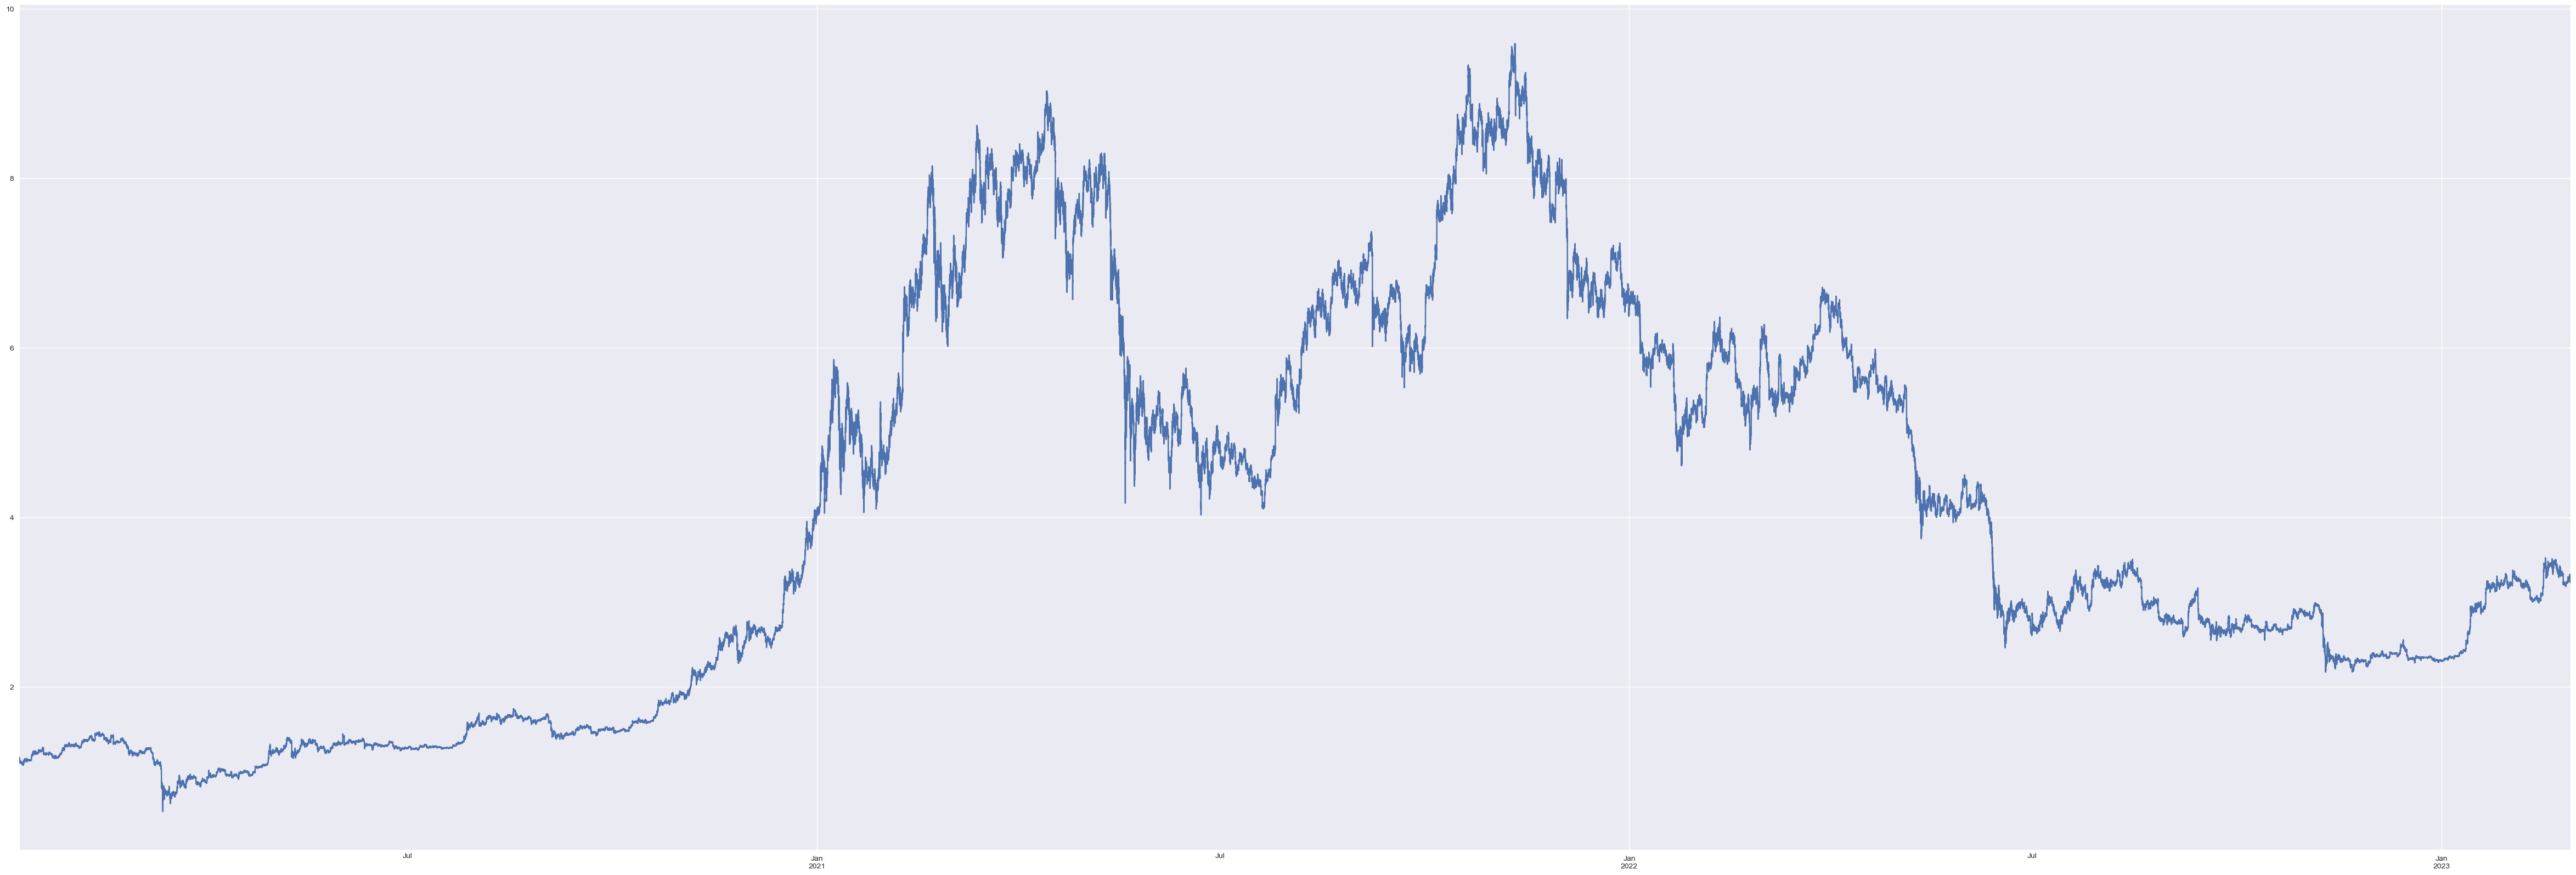

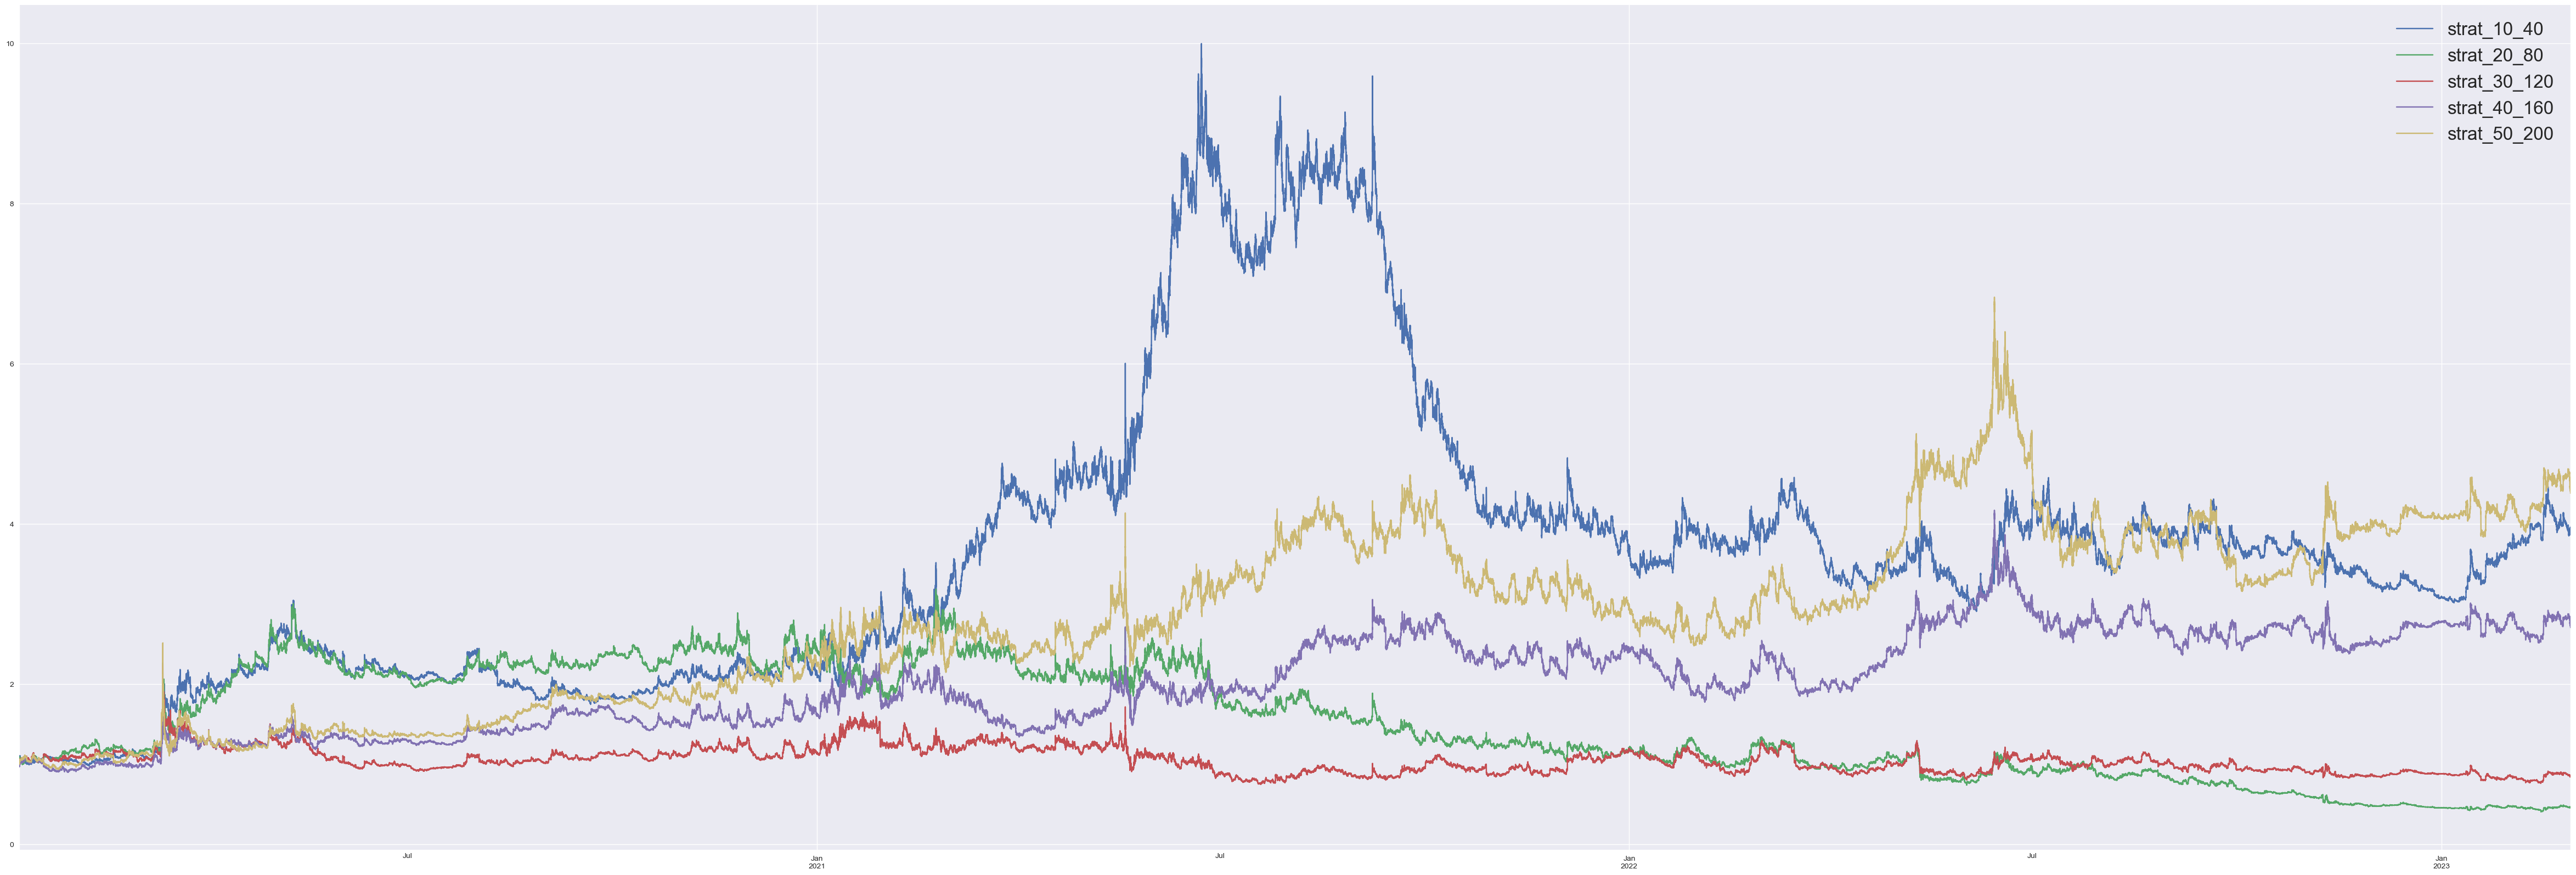

In [3]:
plt.style.use('seaborn-v0_8')
plt.rc('legend', fontsize=24)
mpl.rcParams['savefig.dpi'] = 5000

# data.plot(title='BTCUSDT daily | MA 50/200', figsize=figsize)
# data.position.plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=figsize)
# data.returns.hist(bins=100, figsize=figsize)

data['returns_cs'].plot(figsize=figsize)

data[[
    'strat_10_40',
    'strat_20_80',
    'strat_30_120',
    'strat_40_160',
    'strat_50_200'
    ]].plot(figsize=figsize)